<a href="https://colab.research.google.com/github/brittanymlassiter/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Brittany Lassiter

## Project Overview

#### Sales Prediction for food items from various stores

## Imports

In [469]:
## Numpy
import numpy as np
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns


## Warnings
import warnings

In [470]:
##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

 - https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [471]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 12,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 6,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

Loading Data

In [472]:
# Mount google drive
from google.colab import drive

In [473]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [474]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [475]:
# Display the first rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [476]:
eda_ml = df.copy()

In [477]:
# Display the info for the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

1) How many rows?
  '8523 rows'

2) How many columns?
  '7 columns'  



In [478]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
df.duplicated().sum()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows = df.duplicated(keep=False)
duplicated_rows.sum()

0

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [480]:
# Get the number of null values for all columns and save as a variable
df.isna()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [481]:
# This will give us the total number of null values (True) for each column
null_sums = df.isna().sum()
null_sums


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

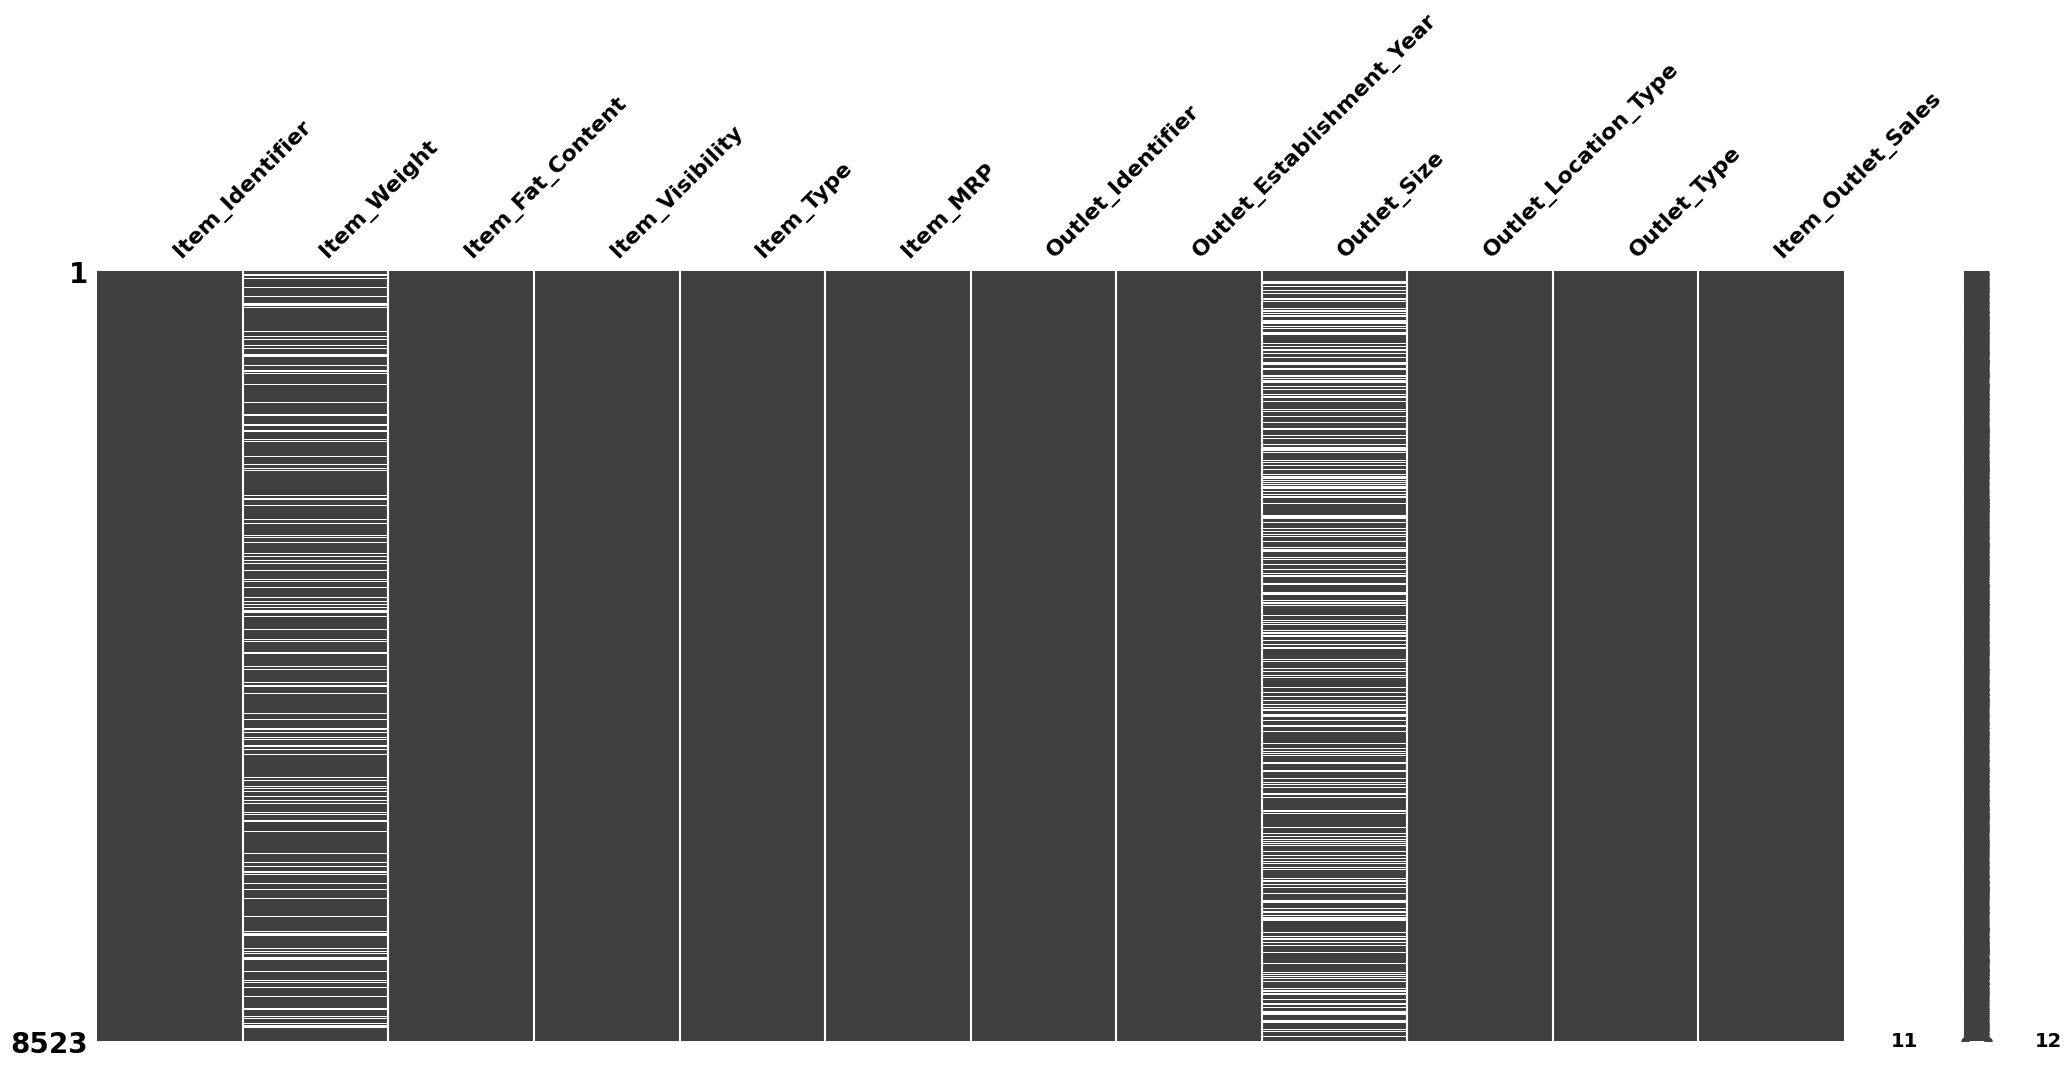

In [482]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

In [483]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [484]:
# use the list of cat columns to fill null values with MISSING
df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")
df['Outlet_Size'].value_counts(dropna=False)

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [485]:
# Saving list of column names for numeric cols
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [486]:
# Filling null values with -1
df[num_cols] = df[num_cols].fillna(-1)


In [487]:
df[num_cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


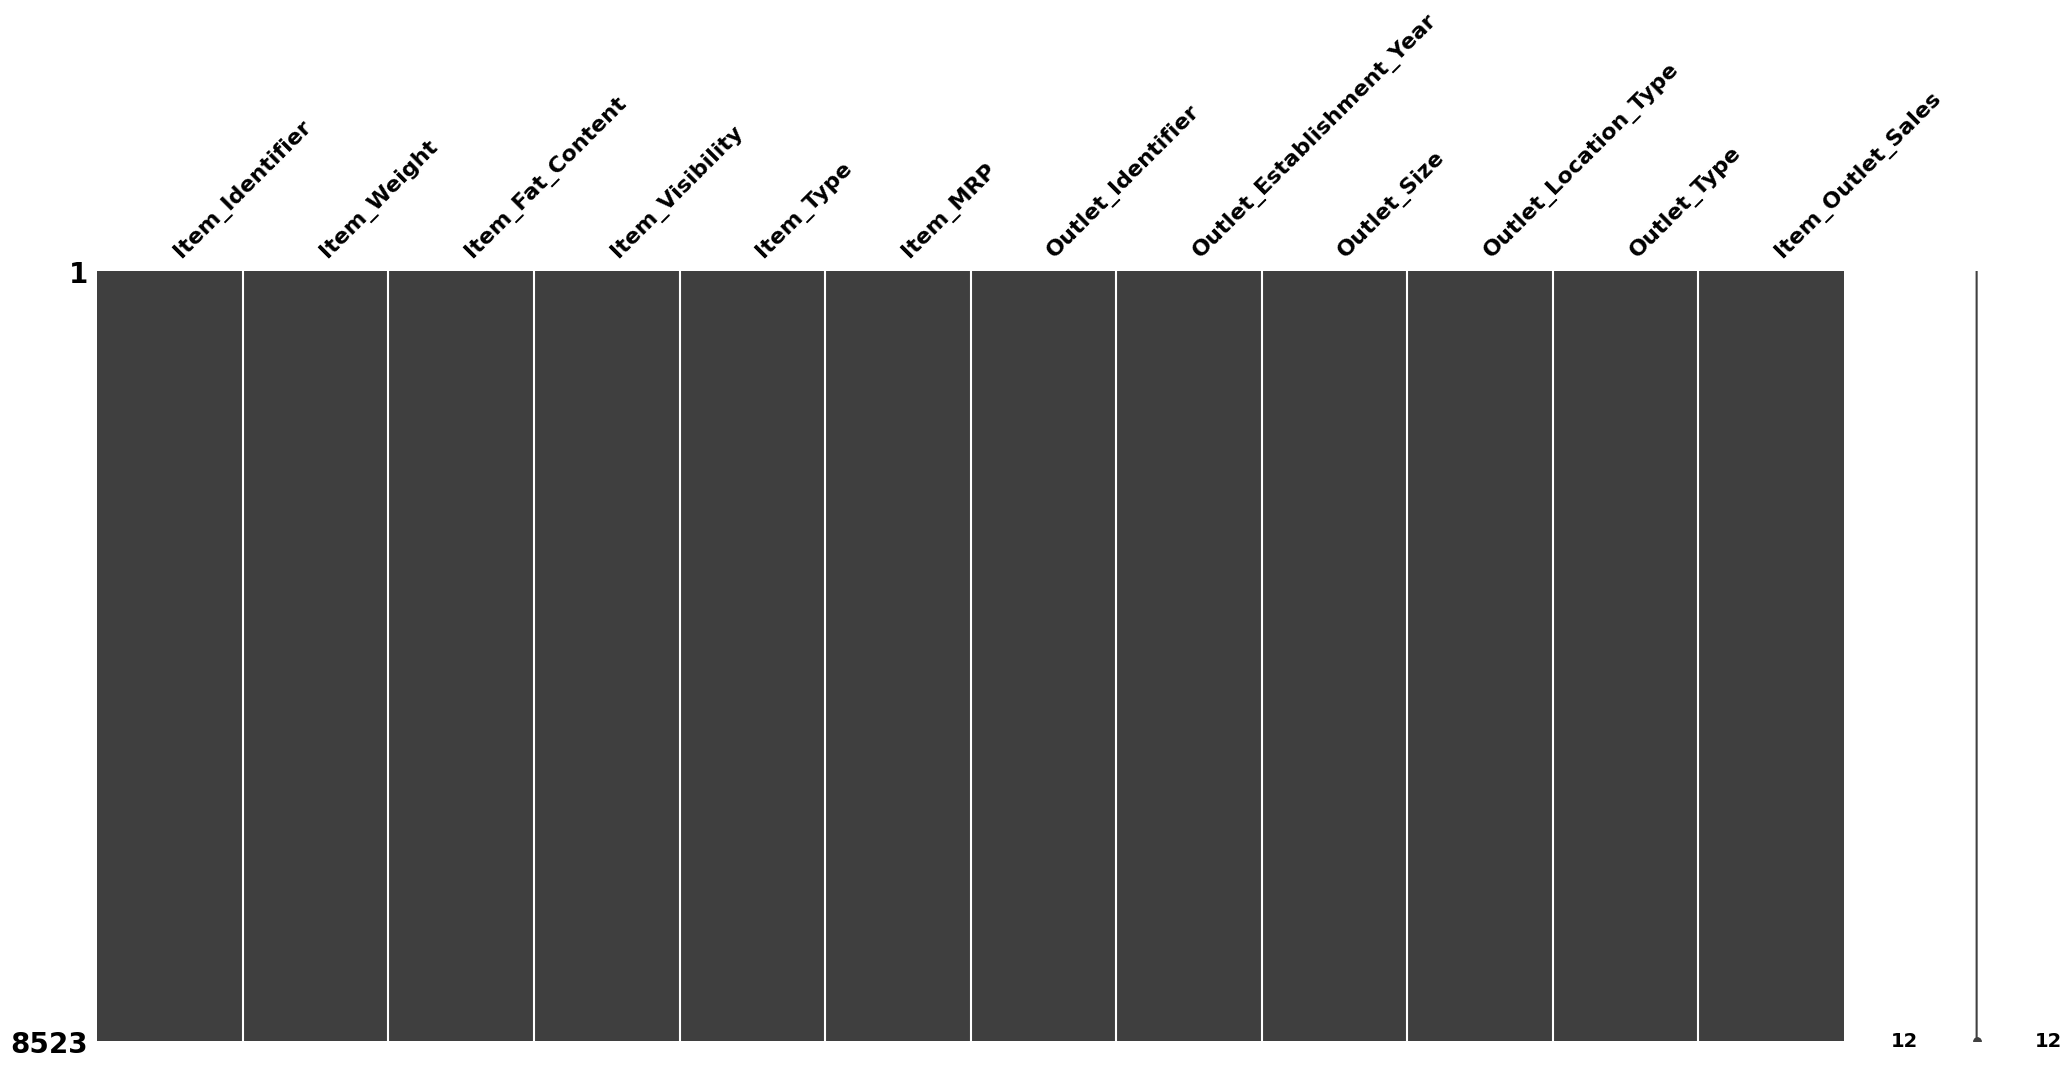

In [488]:
# Confirm no more nulls using using missingno
import missingno as msno
msno.matrix(df);

In [489]:
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns

string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [490]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols



Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [491]:
# Check the nunique for just the object cols
df.nunique()[string_cols]

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [492]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [493]:
# Explore the value counts of one feature
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [494]:
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace({'LF':'Low Fat'})
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [495]:
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace({'reg':'Regular'})
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [496]:
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace({'low fat':'Low Fat'})
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [497]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [498]:
# Explore the value counts of one feature
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [499]:
# Confirm no more nulls using Pandas
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [500]:
df[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [501]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [502]:
# average of numerical cols
df.mean()

<ipython-input-502-b814f9abc2a7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Item_Weight                    10.478936
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [503]:
# find min for each numerical cols
df.min()

Item_Identifier                      DRA12
Item_Weight                           -1.0
Item_Fat_Content                   Low Fat
Item_Visibility                        0.0
Item_Type                     Baking Goods
Item_MRP                             31.29
Outlet_Identifier                   OUT010
Outlet_Establishment_Year             1985
Outlet_Size                           High
Outlet_Location_Type                Tier 1
Outlet_Type                  Grocery Store
Item_Outlet_Sales                    33.29
dtype: object

In [504]:
# find max for each numerical cols
df.max()

Item_Identifier                          NCZ54
Item_Weight                              21.35
Item_Fat_Content                       Regular
Item_Visibility                       0.328391
Item_Type                        Starchy Foods
Item_MRP                              266.8884
Outlet_Identifier                       OUT049
Outlet_Establishment_Year                 2009
Outlet_Size                              Small
Outlet_Location_Type                    Tier 3
Outlet_Type                  Supermarket Type3
Item_Outlet_Sales                   13086.9648
dtype: object

## Exploratory Data Analysis

*Distributions* from various items.

array([[<Axes: title={'center': 'Item_Weight'}>,
        <Axes: title={'center': 'Item_Visibility'}>],
       [<Axes: title={'center': 'Item_MRP'}>,
        <Axes: title={'center': 'Outlet_Establishment_Year'}>],
       [<Axes: title={'center': 'Item_Outlet_Sales'}>, <Axes: >]],
      dtype=object)

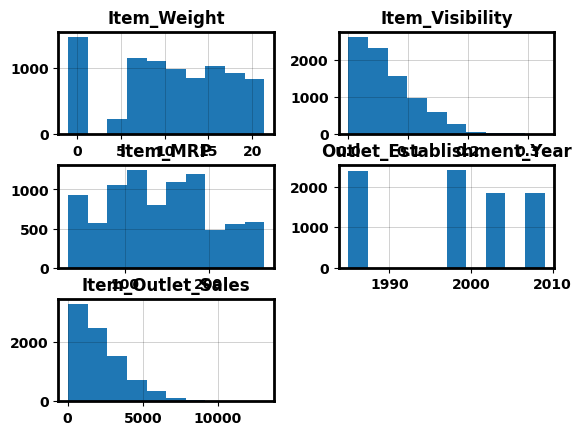

In [505]:
# Histograms to view the distributions of numerical features in your dataset.
df.hist()

<Axes: >

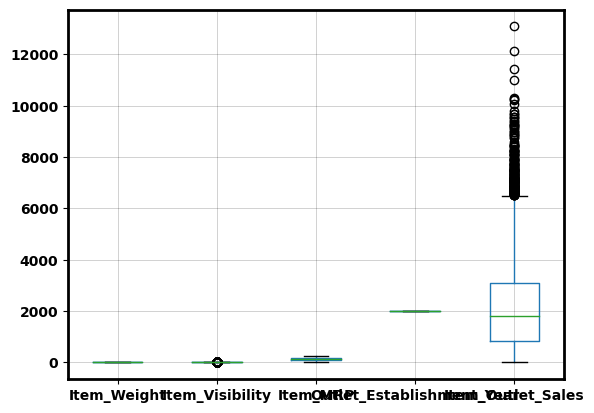

In [506]:
# Boxplots to view statistical summaries of numerical features in your dataset.
df.boxplot()

In [507]:
# Countplots to view the frequency of each class of categorial features in your dataset.
# Checking how many categories in each categorical column
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

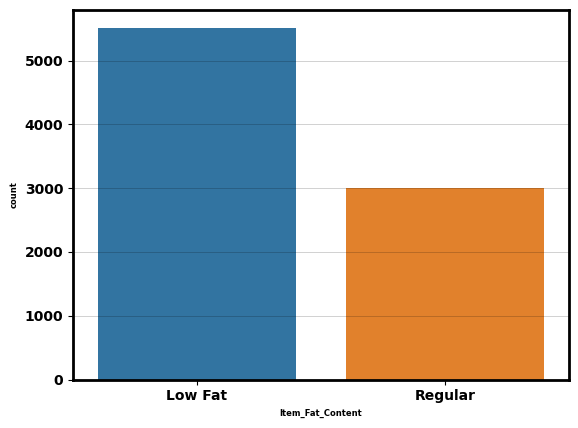

In [508]:
# Univariate countplot
ax = sns.countplot(data=df, x='Item_Fat_Content')

Heatmaps to view correlations from numberic data.

In [509]:
# Heatmap to view the correlation between features
corr = df.corr(numeric_only = True)
corr.round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


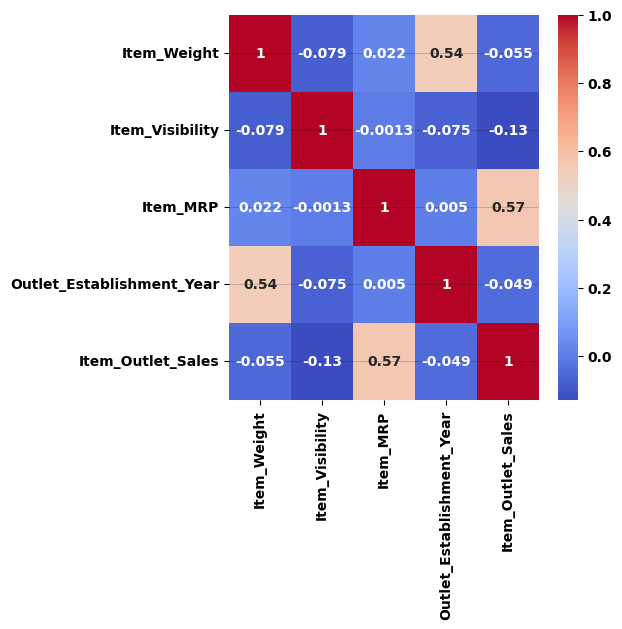

In [510]:
# Make a heatmap of correlations
# Create a fig, ax with a figsize argument
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, ax=ax);

## Feature Inspection

### Replacing the Placeholders with the nulls


In [511]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [512]:
df.shape

(8523, 12)

In [513]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [514]:
# Replace "Missing" with "NaN"
df['Item_Weight'] = df['Item_Weight'] .replace({-1:np.NAN})
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [515]:
df['Item_Weight'].isna().sum()

1463

In [516]:
df['Outlet_Size'] = df['Outlet_Size'].fillna("Missing")
df['Outlet_Size']

0        Medium
1        Medium
2        Medium
3       Missing
4          High
         ...   
8518       High
8519    Missing
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [517]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [518]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'Missing':pd.NA})
df['Outlet_Size']

0       Medium
1       Medium
2       Medium
3         <NA>
4         High
         ...  
8518      High
8519      <NA>
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

### *TERMS*
>>Numeric Features are integers or floats that represent a quantity. They can also be referred to as quantitative features.

>>Ordinal Features are categories that represent different classes and that have a distinct ordering.

>>Categorical Features (nominal) are categories that represent different classes. They are not ordered.

###### **Explore Univariate Categorical Function**

In [519]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

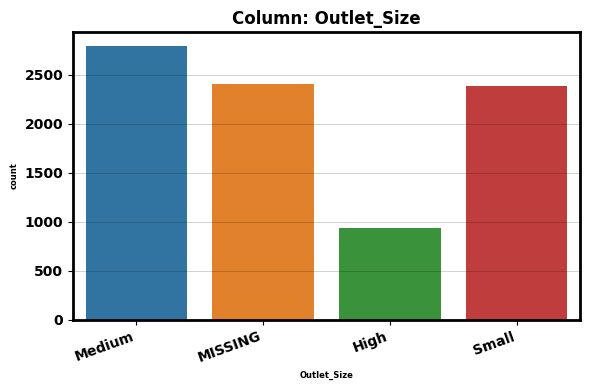

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [520]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Outlet_Size')

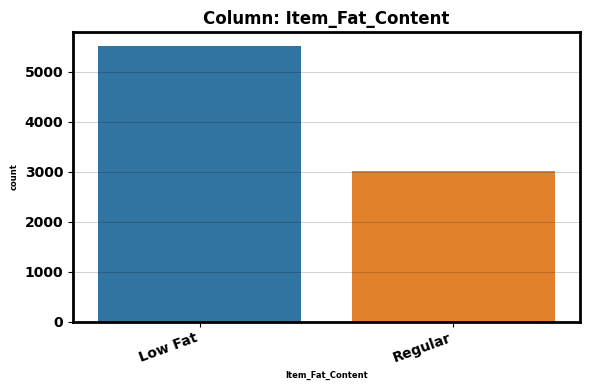

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [521]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Item_Fat_Content')

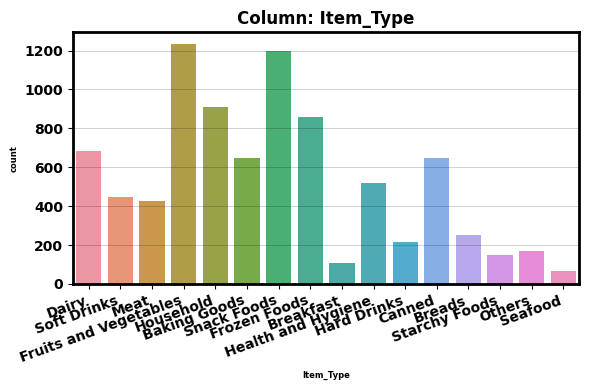

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [522]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Item_Type')

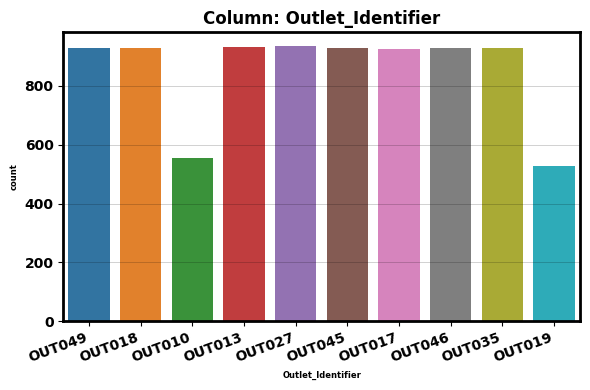

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [523]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Outlet_Identifier')

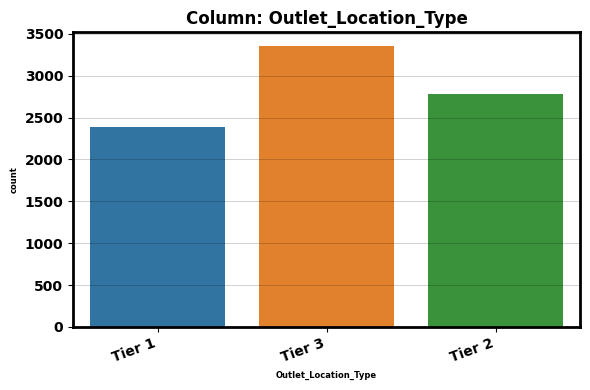

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [524]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Outlet_Location_Type')

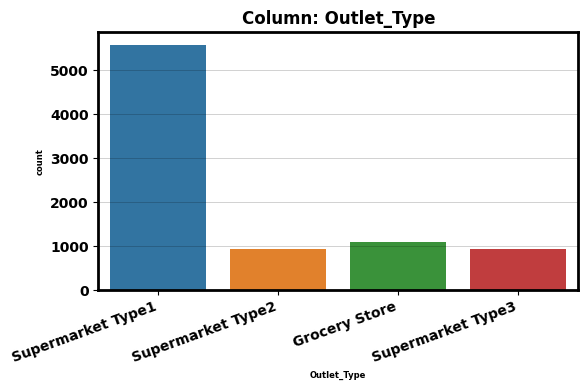

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [525]:
# Call Univariate categorical EDA function
explore_categorical(df, 'Outlet_Type')

### **Questions**

```
# What type of feature is it? (Categorical (nominal), ordinal, numeric)
`ordinal`


# How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
`Outlet_Size = 2410 (28.28%)`

```
`# Is the feature constant or quasi-constant?
`None`


```
# What is the cardinality? Is it high (>10)?
`1559`


```
 Would we know this feature before the target is determined?
`Yes`


```
# Is there a business case/understanding reason to exclude based on our business case?
`No`



###### **Explore Univariate Numerical Function**

In [526]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [527]:
## Define a variable to indentify the feature
## Display the Features datatype
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [528]:
## define a variable to indetify the feature
## display the feature datatype
df['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

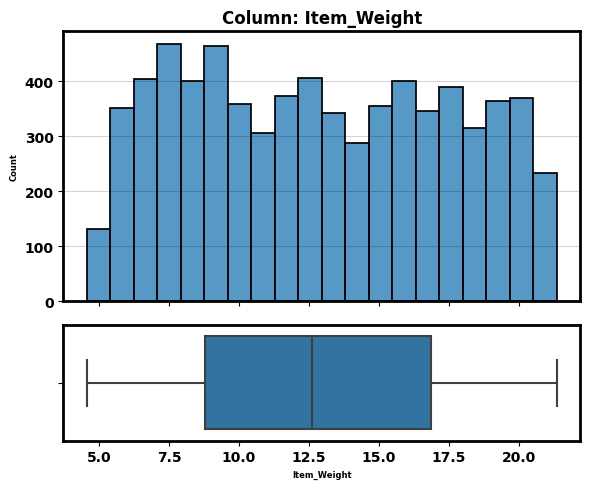

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [529]:
# Call Univariate Numeric EDA function
explore_numeric(df, 'Item_Weight')

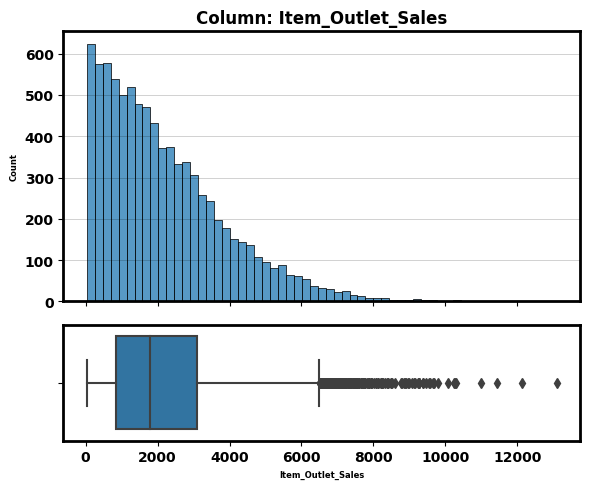

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Outlet_Sales'}, xlabel='Item_Outlet_Sales', ylabel='Count'>,
        <Axes: xlabel='Item_Outlet_Sales'>], dtype=object))

In [530]:
from pandas._libs.tslibs import dtypes
# Call Univariate Numeric EDA function
explore_numeric(df, 'Item_Outlet_Sales')

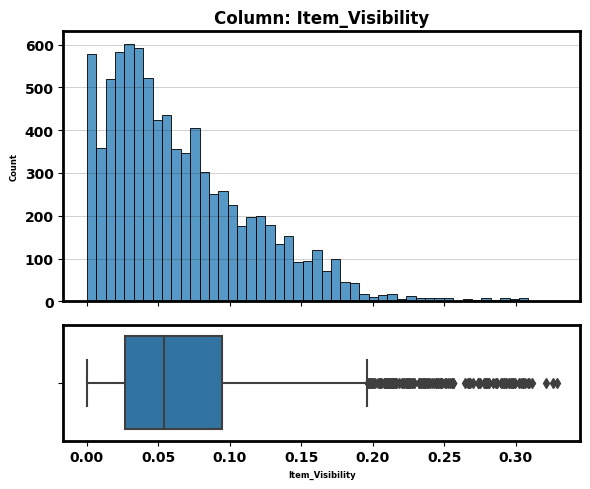

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [531]:
# Call Univariate Numeric EDA function
explore_numeric(df, 'Item_Visibility')

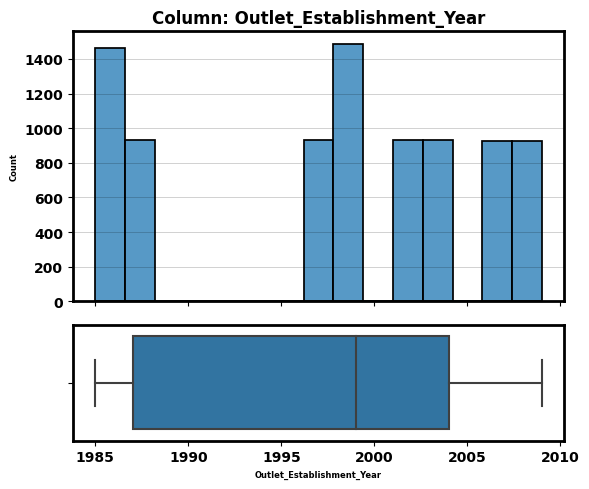

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [532]:
# Call Univariate Numeric EDA function
explore_numeric(df, 'Outlet_Establishment_Year')

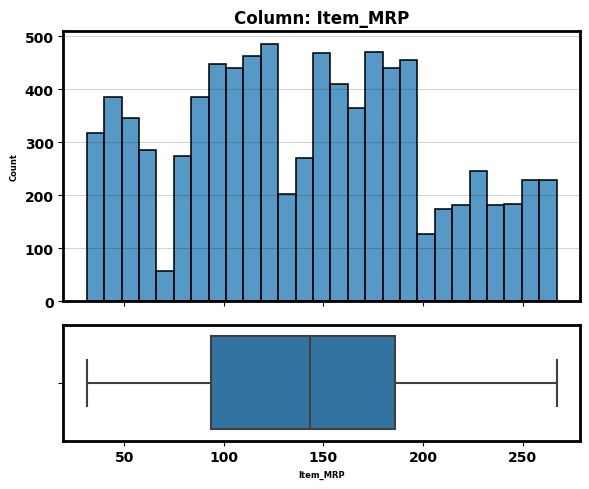

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [533]:
# Call Univariate Numeric EDA function
explore_numeric(df, 'Item_MRP')

###### **Explore Multivariate Categorical Function**

In [534]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

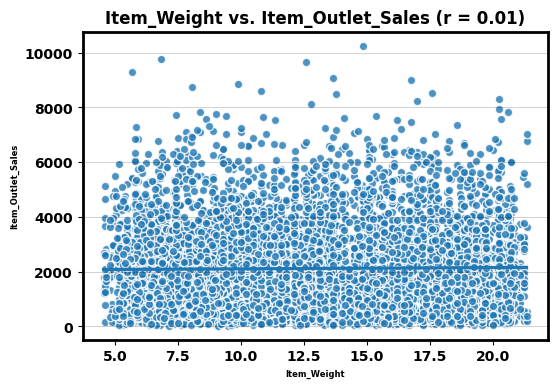

In [535]:
## Call multivariate numerical EDA function
plot_numeric_vs_target(df, x= 'Item_Weight', y='Item_Outlet_Sales');

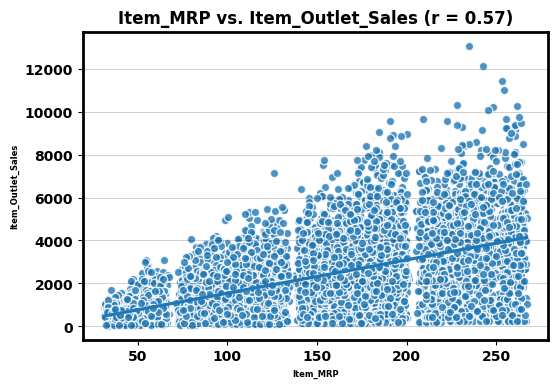

In [536]:
## Call multivariate numerical EDA function
plot_numeric_vs_target(df, x= 'Item_MRP', y='Item_Outlet_Sales');

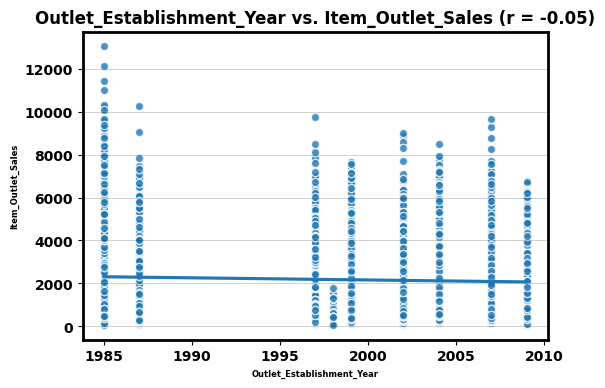

In [537]:
## Call multivariate numerical EDA function
plot_numeric_vs_target(df, x= 'Outlet_Establishment_Year', y='Item_Outlet_Sales');

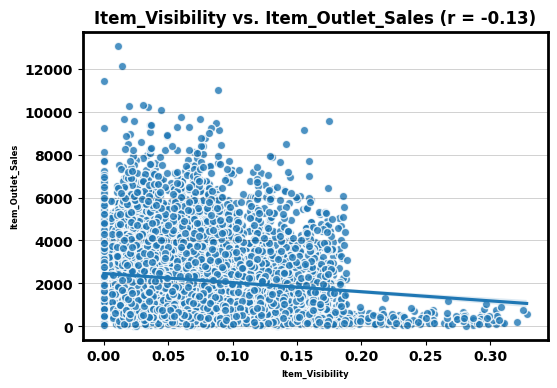

In [538]:
## Call multivariate numerical EDA function
plot_numeric_vs_target(df, x= 'Item_Visibility', y='Item_Outlet_Sales');

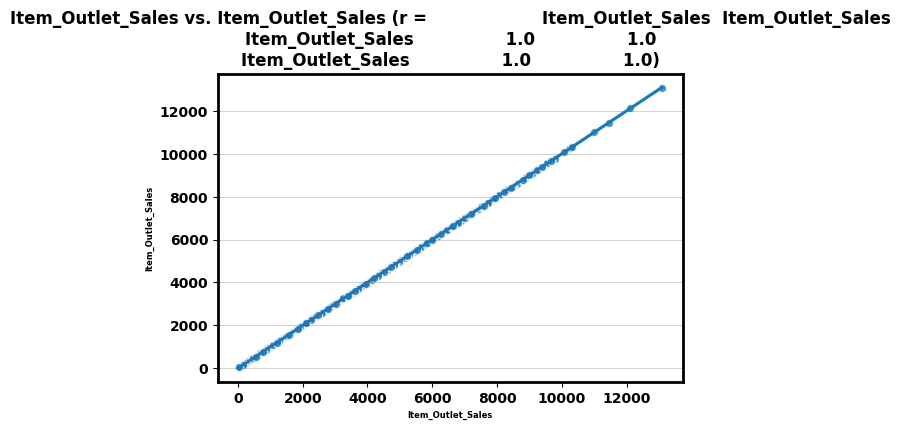

In [539]:
## Call multivariate numerical EDA function
plot_numeric_vs_target(df, x= 'Item_Outlet_Sales', y='Item_Outlet_Sales');

In [540]:
def plot_categorical_vs_target(df, x, y='SalePrice',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

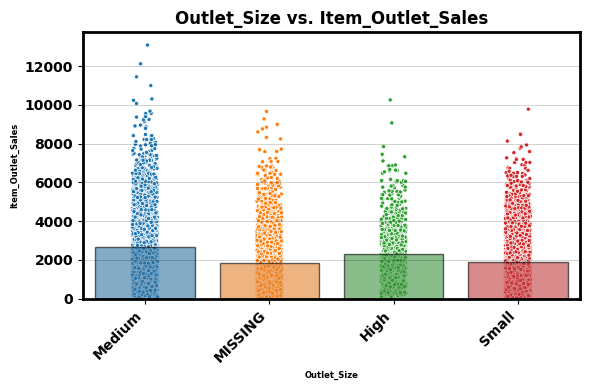

In [541]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Outlet_Size', y='Item_Outlet_Sales');

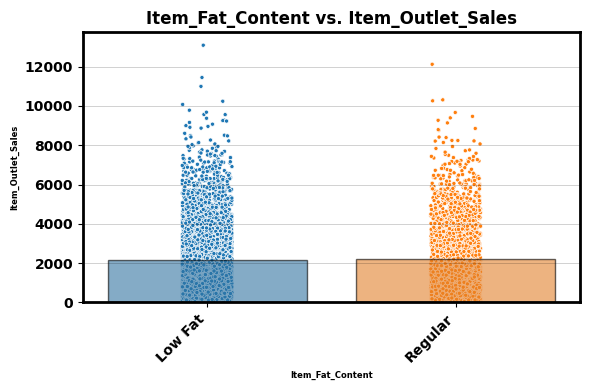

In [542]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Item_Fat_Content', y='Item_Outlet_Sales');

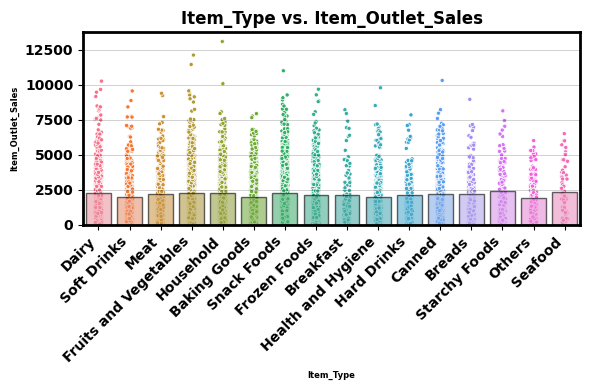

In [543]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Item_Type', y='Item_Outlet_Sales');

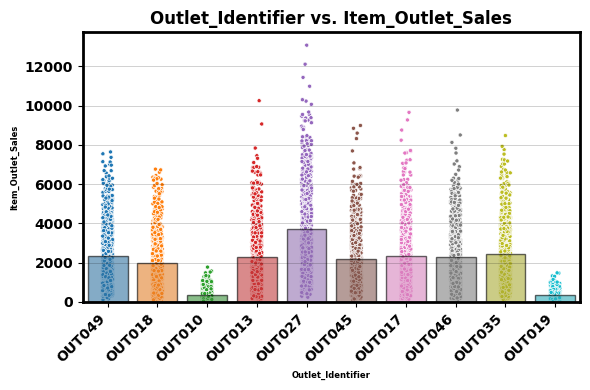

In [544]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Outlet_Identifier', y='Item_Outlet_Sales');

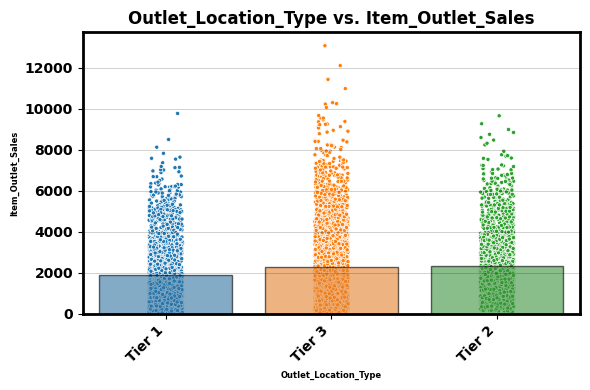

In [545]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Outlet_Location_Type', y='Item_Outlet_Sales');

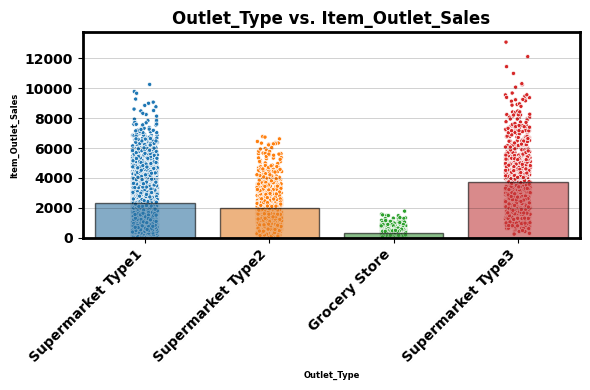

In [546]:
###### **Explore Multivariate Categorical Function**
plot_categorical_vs_target(df, x= 'Outlet_Type', y='Item_Outlet_Sales');

### **Questions**



```
**Based on your business understanding, would you expect this feature to be a predictor of the target?
`Yes`

```

Does this feature appear to be a predictor of the target?

`Yes`
```


### **Preprocesing for Machine Learning**

### Imports

In [646]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor # NEW

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config

## Warnings
import warnings

In [548]:
def regression_metrics(y_true, y_pred, label='', verbose=True, output_dict=False):

  """Helper Function
  This custom function accept true targets and predictions with custom label
  Calculate and print  MAE, MSE , RMSE and R2 scores by saving it in a dictionary"""

  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

In [549]:
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose=True,
                        output_frame=False, model_name=''):

  """This custom function accepts the model, X_train, y_train, X_test, and y_test
  Obtains the predictions from the model for both training and test data
  Inputs the true and predicted values into the helper function to obtain all the metrics for both the training and test data.
  Prints the results (optional with default as True
  Save the results as a dataframe (optional with default as False)"""

  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label= model_name + ' ' + 'Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label=model_name + ' ' + 'Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train, results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Loading data Part 2

In [550]:
# Mount google drive
from google.colab import drive

In [551]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [552]:
fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df2 = pd.read_csv(fpath)

### Reprocessing of the Data

In [553]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [554]:
# Drop unneccessary columns
df2 = df2.drop(columns= 'Item_Identifier')

# Check for Duplicated, Missing, or Erroneous Data

In [555]:
# Check to see if there are any duplicate rows
df2.duplicated().sum()

0

In [556]:
# Drop duplicte rows
df2.drop_duplicates(inplace=True)

In [557]:
df2.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [558]:
# Display summary info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


In [559]:
# Display the sum of missing values
df2.isna().sum().sum()

3873

In [560]:
# This will give us the total number of null values (True) for each column
null_sums2 = df2.isna().sum()
null_sums2

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [561]:
# Display desriptive statitistics for all collumns
df2.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [562]:
# Display desriptive statitistics for all collumns
df2.describe(include='object')

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,2793,3350,5577


# Fix inconsistencies in categorical data

In [563]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [564]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'] .replace({'LF':'Low Fat'})

In [565]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'] .replace({'low fat':'Low Fat'})

In [566]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'] .replace({'reg':'Regular'})

In [567]:
df2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [568]:
# save list of categorical column name. (Hint: select_dtypes)
cat_cols2 = df2.select_dtypes('object').columns
cat_cols2

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [569]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


# Missing Values: Drop Rows or Impute?

In [570]:
# Check target for null values
df2['Item_Outlet_Sales'].isna().sum()

0

In [571]:
# Drop rows without a Target Value
df2.dropna(subset=['Item_Outlet_Sales'], inplace=True)

How many rows would we lose if we just dropped the rows with missing values?

In [572]:
# Percent of total rows missing values
percent_missing = (1 - df2.dropna().shape[0] / df.shape[0]) * 100
print(f'{percent_missing:.4f} percent of rows are missing at least 1 value')

45.4417 percent of rows are missing at least 1 value


# Identify the features (X) and target (y)

In [573]:
# split X and y, we are predicting price
target = 'Item_Outlet_Sales'
X = df2.drop(columns=[target]).copy()
y = df2[target].copy()

# split training and test

# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35 , random_state=42)

In [574]:
X_train.shape

(5539, 10)

In [575]:
X_test.shape

(2984, 10)

In [576]:
y_train.shape

(5539,)

# Create a preprocessing object

Numeric Pipeline

In [589]:
## Isolate numeric features
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

## Instantiate the transformers
scaler = StandardScaler()

## Define the numeric tuple
num_tuple = ('Numeric', scaler, num_cols)

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Size

In [590]:
# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)

**Categorical Pipline**

In [592]:
## Isolate categorical features
cat_cols = X_train.select_dtypes("object").columns
print("Categorical Features:", cat_cols)

## Instantiate the transformers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

## Define the categorical nominal tuple
cat_tuple = ('Categorical', ohe, cat_cols)

Categorical Features: Index([], dtype='object')


**Column Transformer**

In [593]:
ColumnTransformer,
## Create the preprocessor using make_column_transformer
preprocessor = ColumnTransformer([num_tuple,
                                  cat_tuple],
                                  remainder='drop',
                                  verbose_feature_names_out=False)

In [595]:
# Fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('Numeric', StandardScaler(),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', '...
       'Outlet_Size_missing', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')),
                                ('Categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index([], dtype='object'))],
                  verbose_feature_names_out=False)

In [596]:
# Transform the X_train and the X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Create Preprocessing

In [597]:
# Display the first (5) rows of the dataframe
display(X_train_processed.head())

# Check the shape
print(f'\nshape of processed data is: {X_train_processed.shape}')

# Check for remaining missing values
print(f'\nThere are {X_train_processed.isna().sum().sum()} missing values')

# Check the data types
print(f'\nThe datatypes are {X_train_processed.dtypes}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_missing,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
90,1.858050,-0.494773,-0.316972,0.012489,0.734192,-0.734192,-0.277107,-0.165114,-0.117948,-0.287176,...,-0.696410,-0.623073,1.588564,-0.614704,-0.701274,1.234752,2.648758,-1.375656,-0.353086,-0.351792
4329,0.523536,1.784298,-1.272086,0.012489,-1.362041,1.362041,-0.277107,-0.165114,-0.117948,-0.287176,...,-0.696410,-0.623073,1.588564,-0.614704,-0.701274,1.234752,2.648758,-1.375656,-0.353086,-0.351792
7775,-0.126006,-0.623782,0.893291,0.131755,-1.362041,1.362041,-0.277107,-0.165114,-0.117948,-0.287176,...,1.435936,-0.623073,-0.629499,1.626800,-0.701274,-0.809879,-0.377535,0.726926,-0.353086,-0.351792
5480,-0.976316,0.176010,0.705513,0.489555,-1.362041,1.362041,-0.277107,-0.165114,-0.117948,-0.287176,...,-0.696410,-0.623073,1.588564,-0.614704,1.425976,-0.809879,-0.377535,0.726926,-0.353086,-0.351792
4032,1.019550,-1.049423,0.335324,-0.106778,-1.362041,1.362041,-0.277107,-0.165114,-0.117948,3.482182,...,-0.696410,1.604947,-0.629499,1.626800,-0.701274,-0.809879,-0.377535,0.726926,-0.353086,-0.351792



shape of processed data is: (5539, 43)

There are 0 missing values

The datatypes are Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_

### **Baseline Model**


In [600]:
## Create an instance of the model
dummy = DummyRegressor(strategy = 'mean')

## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)

## Fit the model
dummy_pipe.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric', StandardScaler(),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foo...
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')),
                                                 ('Categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

#### **Metrics**

In [601]:
## Define the model predictions for train
train_preds = dummy_pipe.predict(X_train)
## Define the model predictions for test
test_preds = dummy_pipe.predict(X_test)
## Inspect the first (5) predictions for train
train_preds[:5]

array([2211.08093125, 2211.08093125, 2211.08093125, 2211.08093125,
       2211.08093125])

In [602]:
## Check predictions against features
print('First Row of X_train')
display(X_train.iloc[0])

First Row of X_train


Item_Weight                        1.858050
Item_Visibility                   -0.494773
Item_MRP                          -0.316972
Outlet_Establishment_Year          0.012489
Item_Fat_Content_Low Fat           1.000000
Item_Fat_Content_Regular           0.000000
Item_Type_Baking Goods             0.000000
Item_Type_Breads                   0.000000
Item_Type_Breakfast                0.000000
Item_Type_Canned                   0.000000
Item_Type_Dairy                    0.000000
Item_Type_Frozen Foods             0.000000
Item_Type_Fruits and Vegetables    1.000000
Item_Type_Hard Drinks              0.000000
Item_Type_Health and Hygiene       0.000000
Item_Type_Household                0.000000
Item_Type_Meat                     0.000000
Item_Type_Others                   0.000000
Item_Type_Seafood                  0.000000
Item_Type_Snack Foods              0.000000
Item_Type_Soft Drinks              0.000000
Item_Type_Starchy Foods            0.000000
Outlet_Identifier_OUT010        

In [603]:
## Display model performance metrics using a function

dummy_metrics = evaluate_regression(dummy_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True, model_name = 'Baseline Dummy')

dummy_metrics

------------------------------------------------------------
Regression Metrics: Baseline Dummy Training Data
------------------------------------------------------------
- MAE = 1,362.150
- MSE = 2,979,887.098
- RMSE = 1,726.235
- R^2 = 0.000

------------------------------------------------------------
Regression Metrics: Baseline Dummy Test Data
------------------------------------------------------------
- MAE = 1,332.855
- MSE = 2,787,947.437
- RMSE = 1,669.715
- R^2 = -0.003


,MAE,MSE,RMSE,R^2
Baseline Dummy Training Data,1362.150,2979887.098,1726.235,0.000
Baseline Dummy Test Data,1332.855,2787947.437,1669.715,-0.003


### **Linear regression**

In [604]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [606]:
## Create an instance of the model
lin_reg = LinearRegression()

## Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

## Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric', StandardScaler(),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foo...
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')),
                                                 ('Categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

### **Build metrics for the Model**

In [607]:
## Display model performance metrics using a function
lin_reg_metrics = evaluate_regression(lin_reg_pipe, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=True, model_name = 'Linear model')

metrics = pd.concat([lin_reg_metrics])
metrics

------------------------------------------------------------
Regression Metrics: Linear model Training Data
------------------------------------------------------------
- MAE = 852.725
- MSE = 1,313,721.211
- RMSE = 1,146.177
- R^2 = 0.559

------------------------------------------------------------
Regression Metrics: Linear model Test Data
------------------------------------------------------------
- MAE = 808.656
- MSE = 1,198,709.996
- RMSE = 1,094.856
- R^2 = 0.569


,MAE,MSE,RMSE,R^2
Linear model Training Data,852.725,1313721.211,1146.177,0.559
Linear model Test Data,808.656,1198709.996,1094.856,0.569


*According to the R^2 data, the data would be consider overfit.*

### ***Random Forest Model***

In [648]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [649]:
# For reproducible results, set the random state
dec_tree = DecisionTreeRegressor(random_state = 42)

In [650]:
# Fit the model on the training data only
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [651]:
# Make predictions for training and testing data
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [652]:
# Evaluate the model
train_r2_score = r2_score(y_train, train_preds)
test_r2_score = r2_score(y_test, test_preds)
# Print the results
print (f'Training R2 is {train_r2_score:.3f}.')
print (f'Testing R2 is {test_r2_score:.3f}.')

Training R2 is 1.000.
Testing R2 is 0.155.


In [653]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [654]:
# What was the depth of our default tree?
dec_tree.get_depth()

43

### ***GridSearchCV to tune at least two hyperparameters for a Random Forest model***

In [655]:
# Instantiate a default model with random state for reproducibility
model = DecisionTreeRegressor(random_state = 42)
# Fit the default model on the training data
model.fit(X_train, y_train)
# Use custom function to predict and evaluate
evaluate_regression(model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 1,074.278
- MSE = 2,348,477.887
- RMSE = 1,532.474
- R^2 = 0.155


In [656]:
# View parameters that could be tuned
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [657]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}

In [658]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(model, param_grid, n_jobs = -1, verbose = 1)

In [659]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [660]:
# Obtain the best combination directly
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [661]:
# See results of each combination of parameters
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012359,0.004727,0.003294,0.000331,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.232078,0.230124,0.228807,0.237457,0.231998,0.232093,0.002948,298
1,0.010424,0.000938,0.003272,0.000067,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.232078,0.230124,0.228807,0.237457,0.231998,0.232093,0.002948,298
2,0.010246,0.000830,0.003641,0.001279,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.232078,0.230124,0.228807,0.237457,0.231998,0.232093,0.002948,298
3,0.010997,0.001124,0.003374,0.000113,1,2,2,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.232078,0.230124,0.228807,0.237457,0.231998,0.232093,0.002948,298
4,0.010802,0.002101,0.003405,0.000314,1,2,3,"{'max_depth': 1, 'min_samples_leaf': 2, 'min_s...",0.232078,0.230124,0.228807,0.237457,0.231998,0.232093,0.002948,298


In [662]:
# Create a list of all columns containing param_
param_cols = cv_results.columns[ cv_results.columns.str.contains('param_')]
# Limit results to the mean_test_score and parameters. Use the * operator to unpack the param_cols list
results = cv_results.loc[:, ['mean_test_score', *param_cols]].sort_values(by = 'mean_test_score', ascending = False).round(4)
results.head()

,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split
148,0.5840,5,10,3
149,0.5840,5,10,4
147,0.5840,5,10,2
123,0.5833,5,2,2
124,0.5833,5,2,3


In [643]:
# Now define the best version of the model with refit included
best_model = grid_search.best_estimator_

In [644]:
# Use custom function to evalute the model
evaluate_regression( best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 767.518
- MSE = 1,183,731.700
- RMSE = 1,087.994
- R^2 = 0.603

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 739.156
- MSE = 1,116,420.318
- RMSE = 1,056.608
- R^2 = 0.599


### **GridSearchCV with Model Pipelines**

In [663]:
# Combine the preprocessor with the decision tree model in a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [664]:
# Fit the model on the training data only
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric', StandardScaler(),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foo...
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')),
                                                 ('Categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [666]:
# Make predictions and evalute with custom function
evaluate_regression(dec_tree_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 1,074.278
- MSE = 2,348,477.887
- RMSE = 1,532.474
- R^2 = 0.155


In [667]:
# Looking at options for tuning this model
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numeric', StandardScaler(),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
          'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
          'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
          'Item_Type_Dairy', 'Item_Type_Frozen Foods',
          'Item_Type_Fruits and Vegetables', '...
          'Outlet_Size_missing', 'Outlet_Location_Type_Tier 1',
          'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
          'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
          'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
         dtype='object')),
                                   ('Categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                 

In [668]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3, 4]}

In [669]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(dec_tree_pipe, param_grid, n_jobs = -1, verbose = 1)

In [670]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numeric',
                                                                         StandardScaler(),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dair...
                                                                                       sparse_output=False),
                                                                         Index([], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'decisiontreeregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [671]:
# Obtain the best combination directly
grid_search.best_params_

{'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__min_samples_leaf': 10,
 'decisiontreeregressor__min_samples_split': 2}

In [672]:
# Now define the best version of the model
best_model = grid_search.best_estimator_

In [673]:
# Predict and Evaluate with custom function
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics:  Training Data
------------------------------------------------------------
- MAE = 767.518
- MSE = 1,183,731.700
- RMSE = 1,087.994
- R^2 = 0.603

------------------------------------------------------------
Regression Metrics:  Test Data
------------------------------------------------------------
- MAE = 739.156
- MSE = 1,116,420.318
- RMSE = 1,056.608
- R^2 = 0.599


### ***Evaluation***

In [ ]:
-The best model i would choose, is the testing data.

**Model recommended:** Decison Model

- It had the lowest error scores for RMSE  which is most important for this business problem.
- It should usually be able to predict a sales of 1056.